## Домашнее задание к лекции "Статистика. Практика"

### Задание 1

Вернемся к набору данных о видеоиграх.
Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?
2) Критикам нравятся больше игры на PC или на PS4?
3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

    сформулируйте нулевую и альтернативную гипотезы;
    выберите пороговый уровень статистической значимости;
    опишите полученные результаты статистического теста.

In [2]:
import numpy
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

parameters = {
    'axes.labelsize':  14,
    'figure.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'legend.title_fontsize': 14
}
plt.rcParams.update(parameters)

In [2]:
df = pd.read_csv('video_games_sales.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


#### 1) Как критики относятся к спортивным играм? 
Сформулируем нулевую гипотезу, что критики относятся к спортивным играм в среднем также, как и ко всем другим.
Будем проверять её на урове значимости в 0.01.

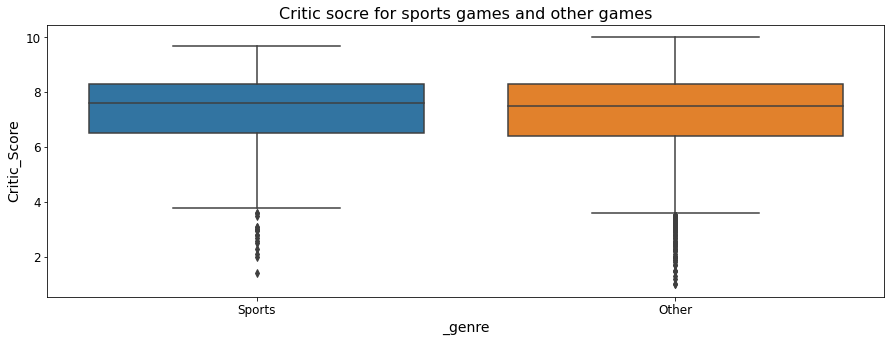

In [3]:
plt.subplots(1, figsize=(15, 5))
plot_category = df['Genre'].copy()
plot_category[plot_category != 'Sports'] = 'Other'
df['_genre'] = plot_category

#fig = plt.figure(figsize=(15, 5), dpi=80)
plt.title('Critic socre for sports games and other games')
ax = sns.boxplot(y = 'Critic_Score', x = '_genre', data=df)

Визуализация показывает, что разница в оценках между спортивными играми и всеми другими минимальна. Проверим это численно.

In [4]:
(
    stats.bayes_mvs(df[df['Genre'] == 'Sports']['Critic_Score'].dropna()),
    stats.bayes_mvs(df[df['Genre'] != 'Sports']['Critic_Score'].dropna())
)

((Mean(statistic=7.2914244186046515, minmax=(7.199066658711668, 7.383782178497635)),
  Variance(statistic=2.169575772364624, minmax=(1.9839628627841606, 2.369561967778151)),
  Std_dev(statistic=1.472410513003576, minmax=(1.408532166045263, 1.539338159008004))),
 (Mean(statistic=7.204565663474693, minmax=(7.173338044725628, 7.235793282223757)),
  Variance(statistic=2.1078057621041766, minmax=(2.0436893576152713, 2.171922166593082)),
  Std_dev(statistic=1.4518284203390484, minmax=(1.4297471593612767, 1.47390968131682))))

Разница между дисперсиями выборок минимальна, поэтому будем применять t-тест Стъюдента.

In [5]:
stats.ttest_ind(
    df[df['Genre'] == 'Sports']['Critic_Score'].dropna(),
    df[df['Genre'] != 'Sports']['Critic_Score'].dropna()
)

Ttest_indResult(statistic=1.4822013673543033, pvalue=0.13833494772149718)

По результатам вычислений не получается отвергнуть нулевую гипотезу о том, что критики относятся к спортивным играм также, как и к другим.

#### 2) Критикам нравятся больше игры на PC или на PS4?
Проверим нулевую гипотезу о том, что критики в среднем ставят одинаковые оценки как играм на PC, так и играм на PS4. Уровень значимости 0,01.

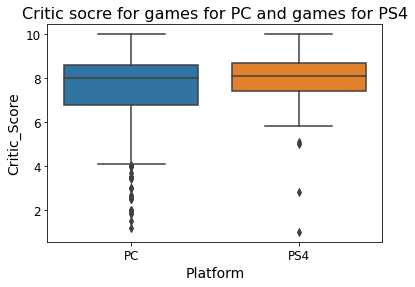

In [6]:
plt.title('Critic socre for games for PC and games for PS4')
ax = sns.boxplot(
    y='Critic_Score',
    x='Platform',
    data=df[df['Platform'].isin(['PC', 'PS4'])]
)

Разница слабая, но у игр для PS4 оценки несколько выше. Также у выборок довольно сильно отличается разброс. Поэтому будем использовать тест Манна-Уитни.

In [7]:
(
    stats.bayes_mvs(df[df['Platform'] == 'PC']['Critic_Score'].dropna()), '\n',
    stats.bayes_mvs(df[df['Platform'] == 'PS4']['Critic_Score'].dropna())
)

((Mean(statistic=7.541849710982659, minmax=(7.46149803644265, 7.6222013855226685)),
  Variance(statistic=2.064553411209313, minmax=(1.9064358142246522, 2.2335449705487327)),
  Std_dev(statistic=1.436438728920209, minmax=(1.380737416826477, 1.4945049248994575))),
 '\n',
 (Mean(statistic=7.904587155963303, minmax=(7.7003655619639435, 8.108808749962662)),
  Variance(statistic=1.6827142115284748, minmax=(1.3385254923763354, 2.0980757772290457)),
  Std_dev(statistic=1.2941389756255903, minmax=(1.1569466246877318, 1.4484736025309697))))

In [8]:
stats.mannwhitneyu(
    df[df['Platform'] == 'PC']['Critic_Score'].dropna(),
    df[df['Platform'] == 'PS4']['Critic_Score'].dropna()
)

MannwhitneyuResult(statistic=40354.0, pvalue=0.0070614764363214535)

Согласно тесту Манна-Уитни нулевая гипотеза о равности средней оценки критиков у игр для PC и игр для PS4 может быть отвергнута. Игры для PS4 имеют статистически значимую (на уровне p=0.007) более высокую среднюю оценку критиков, чем игры для PC.

#### 3) Критикам больше нравятся стрелялки или стратегии?
Проверим нулевую гипотезу о том, что средние оценки критиками стрелялок и стратегий не различаются. Уровень значимости сравнения 0,01. 

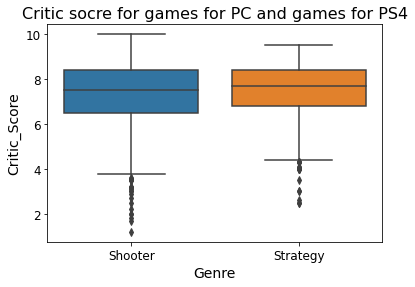

In [9]:
plt.title('Critic socre for games for PC and games for PS4')
ax = sns.boxplot(
    y='Critic_Score',
    x='Genre',
    data=df[df['Genre'].isin(['Strategy', 'Shooter'])]
)

У стратегий оценки несколько выше. Проверим это численно.

In [10]:
(
    stats.bayes_mvs(df[df['Genre'] == 'Shooter']['Critic_Score'].dropna()), '\n',
    stats.bayes_mvs(df[df['Genre'] == 'Strategy']['Critic_Score'].dropna())
)

((Mean(statistic=7.286832740213522, minmax=(7.202195839471209, 7.371469640955835)),
  Variance(statistic=2.232385527876631, minmax=(2.0592675402417986, 2.4175688370192647)),
  Std_dev(statistic=1.4936723612225988, minmax=(1.4350148223073513, 1.554853316882099))),
 '\n',
 (Mean(statistic=7.429268292682925, minmax=(7.310238579147137, 7.548298006218713)),
  Variance(statistic=1.9331254165000666, minmax=(1.710103877551626, 2.180069829701387)),
  Std_dev(statistic=1.3894194259203403, minmax=(1.3077094010335881, 1.47650595315474))))

Дисперсия обеих выборок довольно близка. Будем применять t-тест Стъюдента.

In [11]:
stats.ttest_ind(
    df[df['Genre'] == 'Shooter']['Critic_Score'].dropna(),
    df[df['Genre'] == 'Strategy']['Critic_Score'].dropna()
)

Ttest_indResult(statistic=-1.5618791808752566, pvalue=0.11857794193337436)

Нулевая гипотеза о сходности средних оценок для стрелялок и стратегий не может быть отвергнута на уровне значимости 0,01.

### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:
  1) Привидите весь текст к нижнему регистру;
  
  2) Удалите мусорные символы;
  
  3) Удалите стоп-слова;
  
  4) Привидите все слова к нормальной форме;
  
  5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=cname)

Можете поэкспериментировать с параметрами TfidfVectorizer:

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [3]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import TfidfModel
from gensim import similarities
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

Загружаем данные:

In [4]:
messages = pd.read_csv('spam.csv')
messages.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Приводим к нижнему регистру, удаляем стоп-слова, разделяем на отельные слова и лемматизируем:

In [5]:
# check what is split to set
stopword_set = set(stopwords.words('english'))
word_net_lemmatizer = WordNetLemmatizer()
messages['Message'] = (messages['Message']
                       .apply(lambda x: x.lower())
                       .apply(lambda x: re.sub('[\W_]+', ' ', x))
                       .apply(lambda x: x.split())
                       .apply(lambda x: [i for i in x if i not in stopword_set])
                       .apply(lambda x: [word_net_lemmatizer.lemmatize(i) for i in x])
                      )
messages.head()

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"


Из общего интереса повторяю расчёт матрицы расстояний, как в лекции

In [6]:
dictionary = corpora.Dictionary(messages['Message'])
dict(dictionary)

bows = [dictionary.doc2bow(text) for text in messages['Message']]
# bows = messages['Message'].apply(lambda x: dictionary.doc2bow(x))
# bows
tfidf = TfidfModel(bows)
cos_sim = similarities.MatrixSimilarity(tfidf[bows])
cos_sim_df = pd.DataFrame(list(cos_sim))

cos_sim_df.columns = messages['Category']
cos_sim_df.index = messages['Category']
cos_sim_df

Category,ham,ham,spam,ham,ham,spam,ham,ham,spam,spam,...,ham,ham,ham,ham,spam,spam,ham,ham,ham,ham
Category,,,,,,,,,,,,,,,,,,,,,
ham,1.000000,0.000000,0.000000,0.000000,0.028678,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.030640,0.000000,0.0,0.0,0.000000,0.0
ham,0.000000,1.000000,0.000000,0.035784,0.000000,0.030661,0.000000,0.000000,0.000000,0.011002,...,0.034050,0.000000,0.0,0.0,0.000000,0.022297,0.0,0.0,0.013294,0.0
spam,0.000000,0.000000,1.000000,0.027170,0.000000,0.053007,0.000000,0.000000,0.000000,0.026433,...,0.010052,0.000000,0.0,0.0,0.049433,0.048821,0.0,0.0,0.015970,0.0
ham,0.000000,0.035784,0.027170,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019257,...,0.100794,0.000000,0.0,0.0,0.000000,0.039028,0.0,0.0,0.023269,0.0
ham,0.028678,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spam,0.000000,0.022297,0.048821,0.039028,0.000000,0.000000,0.000000,0.029854,0.092308,0.021322,...,0.027496,0.000000,0.0,0.0,0.117641,1.000000,0.0,0.0,0.014499,0.0
ham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.0
ham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.0


Создаём матрицу с весами слов согласно tfidf

In [7]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(messages['Message'].apply(lambda x: ' '.join(x)))
names = tfidf.get_feature_names()

tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


разделяем все сообщения на тренировочную и тестовую выборки

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, messages['Category'], test_size=0.3, random_state=42
)

In [9]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [10]:
accuracy_score(y_test, clf.predict(X_test))

0.958732057416268

In [11]:
confusion_matrix(y_test, clf.predict(X_test))

array([[1445,    3],
       [  66,  158]])

Аккуратность модели 96%. 98% не спамных сообщений определено верно, и только 2% неспама придётся искать в папке спама. Треть спама пройдёт мимо спам-фильтра, основанного на нашей модели.

Исходные данные для модели содержат существенно всего 13% спамных сообщений, и это усложняет тренировку модели.

In [12]:
messages['Message']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4             [nah, think, go, usf, life, around, though]
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, 750, poun...
5568                   [ü, b, going, esplanade, fr, home]
5569                             [pity, mood, suggestion]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object

Попробуем воспользоваться чистым CountVectorizer без tfidf, поскольку известно, что для коротких текстов tfidf может работать хуже. Также в нашем случае возможно существование слов, которые характеризуют целый класс ham/spam и встречаются во многих текстах этого класса. tfidf сочтёт важность таких слов низкой. 

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [17]:
X = vectorizer.fit_transform(messages['Message'].apply(lambda x: ' '.join(x)))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, messages['Category'], test_size=0.3, random_state=42
)

In [19]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [20]:
accuracy_score(y_test, clf.predict(X_test))

0.9796650717703349

In [21]:
confusion_matrix(y_test, clf.predict(X_test))

array([[1445,    3],
       [  31,  193]])

Использование чистого CounVectorizer без учёта обратной частотности документов с отдельными словами позволило повысить аккуратность модели до 98%. Точность работы с неспамными письмами у данной модели такая же, как и у предыдущей. Однако, работа со спамом существенно улучшилась. Спам-фильтр пропустит всего 13.8% спамных сообщений.